In [110]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LinearSVM,
    HingeLoss,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [111]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [128]:
X, y = clusters(SIZE, stds=[0.9, 1.4], labels=[-1, 1], dtype=DTYPE, generator=GENERATOR)

In [129]:
print("Generated X:", X[90:110], "\nGenerated y:", y[90:110], sep='\n')     # Viewingboth +1 and -1
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-2.5737, -4.2507],
        [-2.8628, -2.0545],
        [-1.2268, -2.7232],
        [-3.4203, -2.5574],
        [-2.9584, -4.6284],
        [-2.8688, -3.7894],
        [-2.2162, -2.2064],
        [-3.3285, -3.2418],
        [-3.8827, -2.3085],
        [-4.3672, -3.1817],
        [ 4.7283,  4.1225],
        [ 4.1613,  4.0419],
        [ 3.6201,  1.0573],
        [ 1.6683,  5.5965],
        [ 3.5564,  1.0206],
        [ 3.7112,  4.7267],
        [ 4.6428,  3.6080],
        [ 3.4287,  3.2256],
        [ 2.3038,  1.3111],
        [ 2.9798,  2.7548]])

Generated y:
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.])

Shape of X: 
torch.Size([200, 2])

Shape of y: 
torch.Size([200])


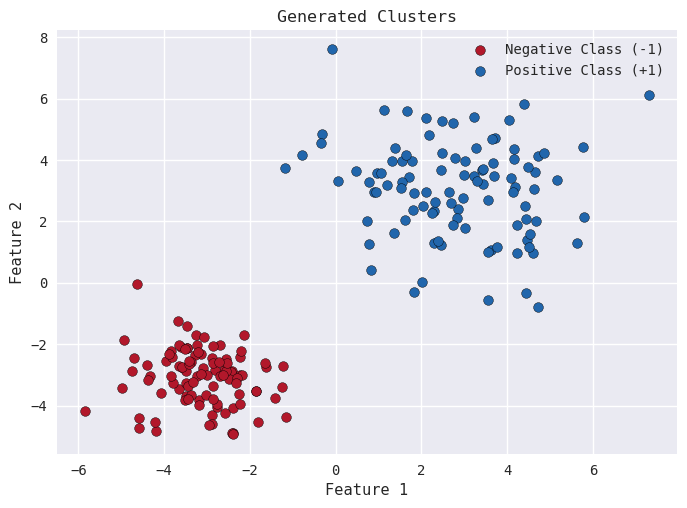

In [130]:
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='#b2182b', label='Negative Class (-1)', edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='#2166ac', label='Positive Class (+1)', edgecolors='k')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [131]:
Data = TensorDataset(X, y)
Data[90:110]        # Slice of Dataset

(tensor([[-2.5737, -4.2507],
         [-2.8628, -2.0545],
         [-1.2268, -2.7232],
         [-3.4203, -2.5574],
         [-2.9584, -4.6284],
         [-2.8688, -3.7894],
         [-2.2162, -2.2064],
         [-3.3285, -3.2418],
         [-3.8827, -2.3085],
         [-4.3672, -3.1817],
         [ 4.7283,  4.1225],
         [ 4.1613,  4.0419],
         [ 3.6201,  1.0573],
         [ 1.6683,  5.5965],
         [ 3.5564,  1.0206],
         [ 3.7112,  4.7267],
         [ 4.6428,  3.6080],
         [ 3.4287,  3.2256],
         [ 2.3038,  1.3111],
         [ 2.9798,  2.7548]]),
 tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.]))

In [132]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [133]:
model = LinearSVM(in_dims=2).to(DEVICE)

In [134]:
trainer = Trainer(
    model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(model.parameters(), lr=.1),
    criterion=HingeLoss(reduction='mean', is_soft=True, C=0.01),        # Hinge Loss (Soft Margin)
    device=DEVICE
)

In [135]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

Epoch 20/20 | Train Loss: 0.0037 | Val Loss: 0.0001: 100%|██████████| 20/20 [00:00<00:00, 103.01it/s]


In [136]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{1: 1.1908025309443473, 2: 0.024520395323634148, 3: 0.016651564836502077, 4: 0.013339609280228615, 5: 0.01110522896051407, 6: 0.010234649106860162, 7: 0.009349168464541435, 8: 0.00885346569120884, 9: 0.008230673521757126, 10: 0.007634622603654861, 11: 0.0070327121764421465, 12: 0.00637839287519455, 13: 0.005776483565568924, 14: 0.0051745731383562085, 15: 0.004683449119329453, 16: 0.0044753577560186384, 17: 0.0042589642107486725, 18: 0.004042569920420647, 19: 0.0038261756300926207, 20: 0.0036563284695148466}

Validation Loss:
{1: 0.011488514952361584, 2: 0.03119766339659691, 3: 0.026730574667453766, 4: 0.005565870553255081, 5: 0.019995197653770447, 6: 0.004431728273630142, 7: 0.01640225201845169, 8: 0.0035334909334778786, 9: 0.0032023247331380844, 10: 0.011484645307064056, 11: 0.0025399960577487946, 12: 0.0022088326513767242, 13: 0.0018776673823595047, 14: 0.006186004728078842, 15: 0.0011054528877139091, 16: 0.0009003095328807831, 17: 0.0006951633840799332, 18: 0.00049001909

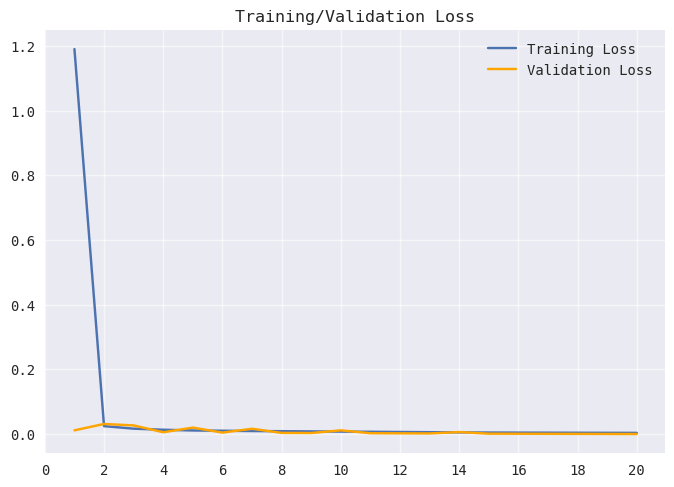

In [137]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [138]:
print(f"Predicted model Parameters:", "Weights: {}".format(model.linear.weight), "Bias: {}".format(model.linear.bias), sep="\n")

Predicted model Parameters:
Weights: Parameter containing:
tensor([[0.6173, 0.5089]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([-0.1265], device='cuda:0', requires_grad=True)


In [139]:
print(f"Shapes for Weight and Bias Tensors:", model.linear.weight.shape, model.linear.bias.shape, sep="\n")

Shapes for Weight and Bias Tensors:
torch.Size([1, 2])
torch.Size([1])


In [140]:
# Ensure model is in eval mode and on CPU for visualization
model.eval()
model.to('cpu')

# Extract weights and bias
w = model.linear.weight.detach().numpy()
b = model.linear.bias.detach().numpy()

In [141]:
# Convert X and y to NumPy arrays (for CPU processes)
Xnp = X.numpy()
ynp = y.numpy()

Xmin, Xmax = Xnp[:, 0].min() - 1, Xnp[:, 0].max() + 1
ymin, ymax = Xnp[:, 1].min() - 1, Xnp[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(Xmin, Xmax, 0.02), np.arange(ymin, ymax, 0.02))

print(f"Generated Grid of points:\n{(XX[:10], yy[:10])}")

Generated Grid of points:
(array([[-6.84284687, -6.82284687, -6.80284687, ...,  8.25715313,
         8.27715313,  8.29715313],
       [-6.84284687, -6.82284687, -6.80284687, ...,  8.25715313,
         8.27715313,  8.29715313],
       [-6.84284687, -6.82284687, -6.80284687, ...,  8.25715313,
         8.27715313,  8.29715313],
       ...,
       [-6.84284687, -6.82284687, -6.80284687, ...,  8.25715313,
         8.27715313,  8.29715313],
       [-6.84284687, -6.82284687, -6.80284687, ...,  8.25715313,
         8.27715313,  8.29715313],
       [-6.84284687, -6.82284687, -6.80284687, ...,  8.25715313,
         8.27715313,  8.29715313]]), array([[-5.94140387, -5.94140387, -5.94140387, ..., -5.94140387,
        -5.94140387, -5.94140387],
       [-5.92140387, -5.92140387, -5.92140387, ..., -5.92140387,
        -5.92140387, -5.92140387],
       [-5.90140387, -5.90140387, -5.90140387, ..., -5.90140387,
        -5.90140387, -5.90140387],
       ...,
       [-5.80140387, -5.80140387, -5.80140387, 

In [142]:

# Predictionon the entire grid
Gp = np.c_[XX.ravel(), yy.ravel()]
G = torch.from_numpy(Gp).float()        # Grid Tensor

mean = X.mean(dim=0, keepdim=True)
std = X.std(dim=0, keepdim=True)
G = (G - mean) / (std + 1e-8)

# Inference
Z = model(G)

Z = Z.detach().numpy()
Z = Z.reshape(XX.shape)

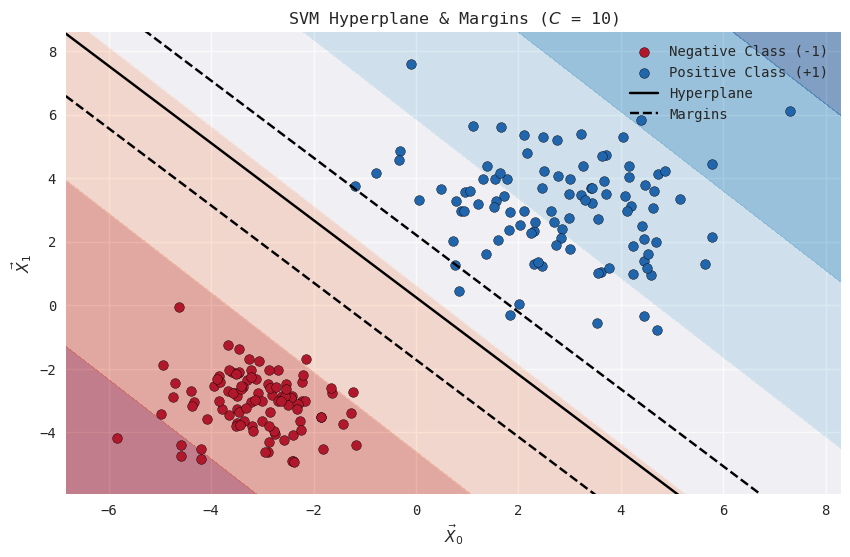

In [143]:

plt.figure(figsize=(10, 6))
# Decision Regions
plt.contourf(XX, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='#b2182b', label='Negative Class (-1)', edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='#2166ac', label='Positive Class (+1)', edgecolors='k')

# Hyperplane
x_ = np.linspace(Xmin, Xmax, 100)
y_ = (-w[0, 0] * x_ - b) / w[0, 1]

plt.plot(x_, y_, 'k-', label='Hyperplane')

# Margins
margin = 1 / np.linalg.norm(w)

y_upper = (-w[0, 0] * x_ - b + 1) / w[0, 1]
y_lower = (-w[0, 0] * x_ - b - 1) / w[0, 1]

plt.plot(x_, y_upper, 'k--', label='Margins')
plt.plot(x_, y_lower, 'k--')

plt.xlim(XX.min(), XX.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$\\vec{X}_0$')
plt.ylabel('$\\vec{X}_1$')
plt.title('SVM Hyperplane & Margins ($C$ = 10)')
plt.legend()
plt.show()